# Clustering for Total Lubmarine

The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

### Context
This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. See more on our website: www.olist.com

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

### Attention
* An order might have multiple items.
* Each item might be fulfilled by a distinct seller.
* All text identifying stores and partners where replaced by the names of Game of Thrones great houses
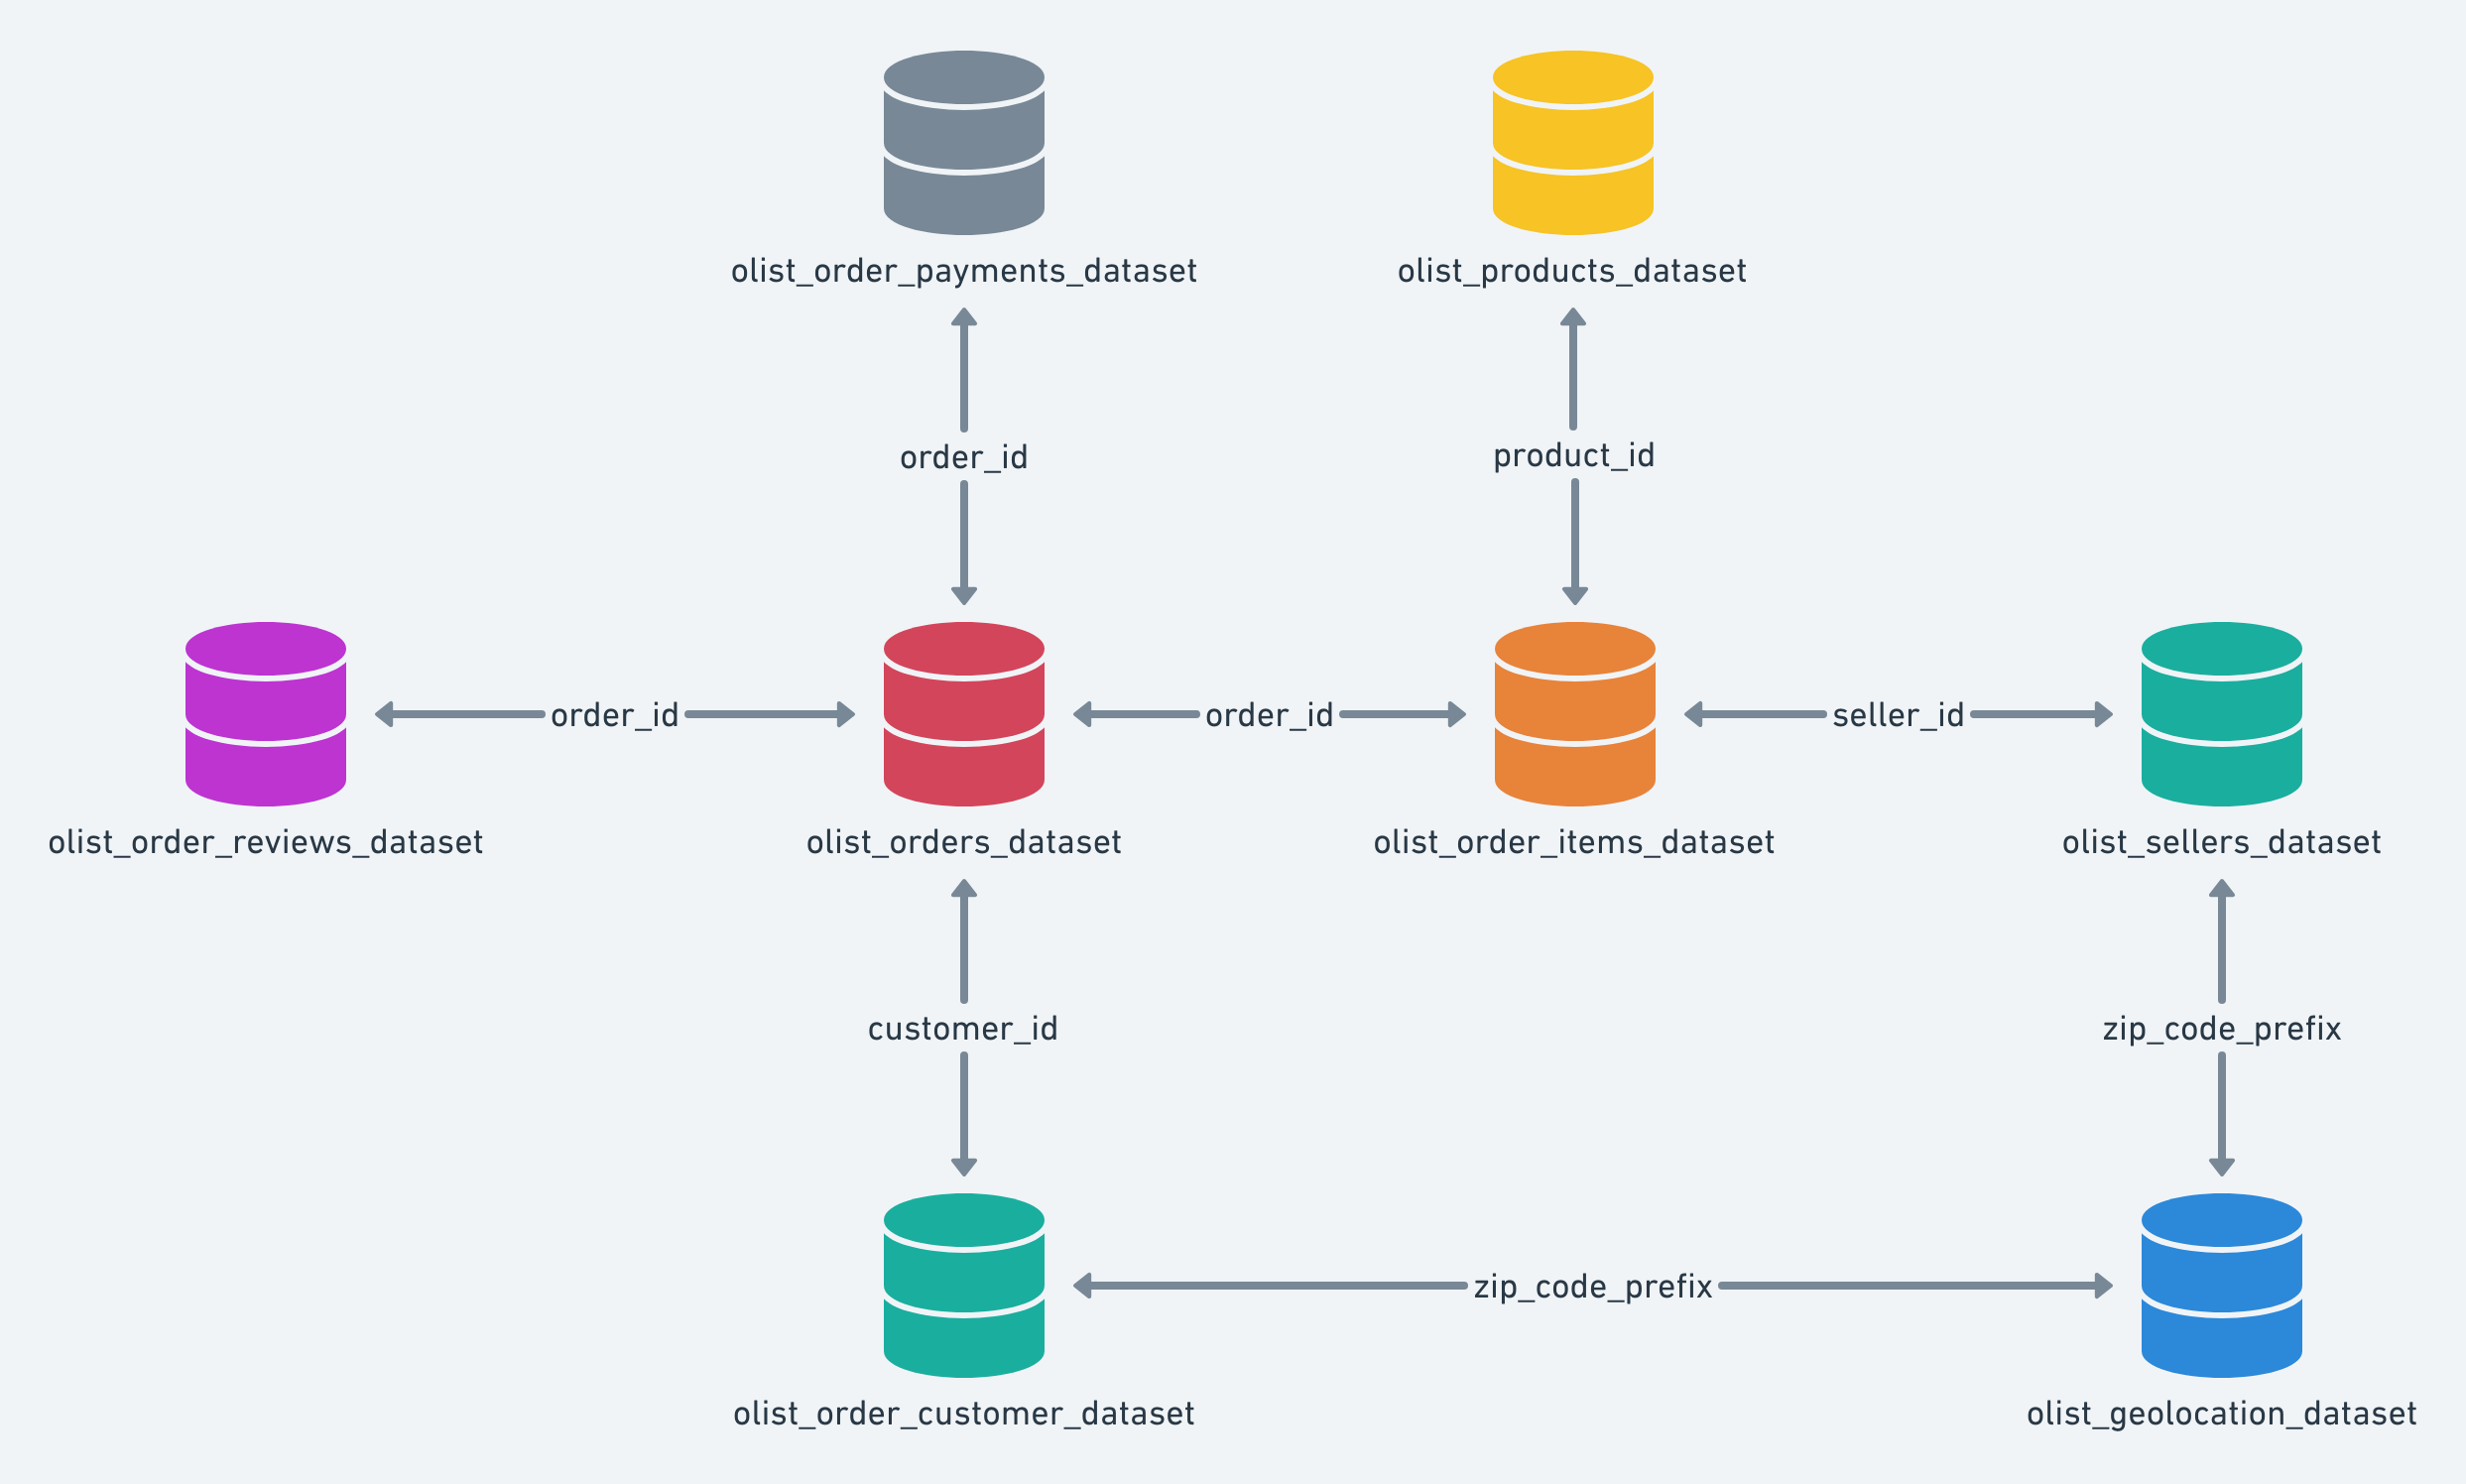


Here are some inspiration for possible outcomes from this dataset.

* **NLP**:
This dataset offers a supreme environment to parse out the reviews text through its multiple dimensions.

* **Clustering**:
Some customers didn't write a review. But why are they happy or mad?

* **Sales Prediction**:
With purchase date information you'll be able to predict future sales.

* **Delivery Performance**:
You will also be able to work through delivery performance and find ways to optimize delivery times.

* **Product Quality**:
Enjoy yourself discovering the products categories that are more prone to customer insatisfaction.

* **Feature Engineering**:
Create features from this rich dataset or attach some external public information to it.


In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update(
    {
     'figure.figsize': (15, 10),
     'axes.labelsize': 15,
     'axes.titlesize':25,
     'xtick.labelsize':15,
     'ytick.labelsize':15,
     'axes.titleweight':'bold',
     'axes.titleweight':'bold'
    })

In [3]:
path = "C:/Users/Lenovo/Documents/IA School/IA School 2/Clustering_Total_Lubmarine/Data/"
path = "C:/Users/ibrah/Desktop/laplateforme/clustring/clustring/data/"
data = []
names = []
filesize = {}
for file in os.listdir(path):
    if file[:5] == 'olist':
        name = file[6:-12]
    else:
        name = file[17:-4]
    locals()[name] = pd.read_csv(os.path.join(path, file), sep =",")
    data.append(locals()[name])
    names.append(name)
    filesize[name]= locals()[name].shape
    print(name)

customers
geolocation
orders
order_items
order_payments
order_reviews
products
sellers
name_translation


In [4]:
print(filesize)

{'customers': (99441, 5), 'geolocation': (1000163, 5), 'orders': (99441, 8), 'order_items': (112650, 7), 'order_payments': (103886, 5), 'order_reviews': (99224, 7), 'products': (32951, 9), 'sellers': (3095, 4), 'name_translation': (71, 2)}


* **Customers Dataset**:
This dataset has information about the customer and its location. Use it to identify unique customers in the orders dataset and to find the orders delivery location.

At our system each order is assigned to a unique customerid. This means that the same customer will get different ids for different orders. The purpose of having a customerunique_id on the dataset is to allow you to identify customers that made repurchases at the store. Otherwise you would find that each order had a different customer associated with.
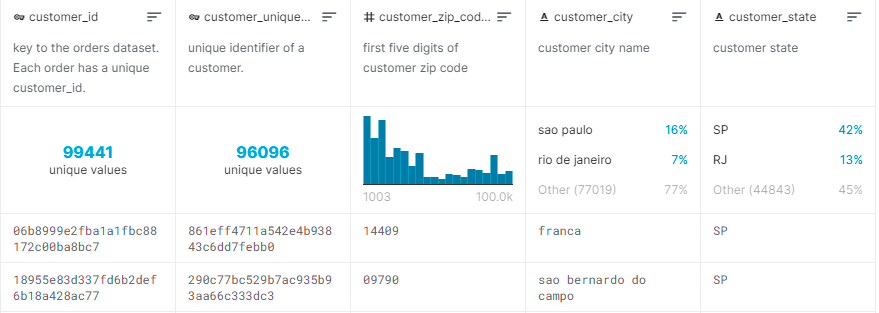


* **Geolocation Dataset**:
This dataset has information Brazilian zip codes and its lat/lng coordinates. Use it to plot maps and find distances between sellers and customers.
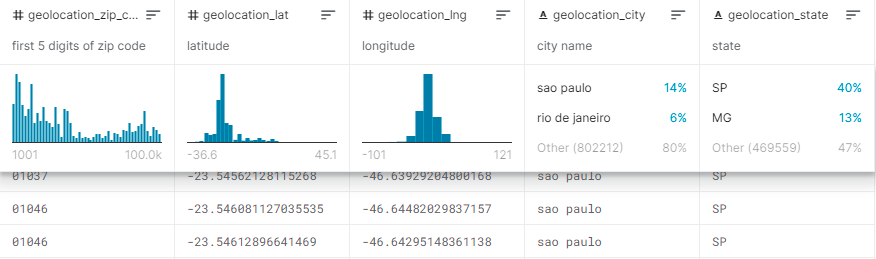


* **Order Items Dataset**:
This dataset includes data about the items purchased within each order.<br>
Example:
The order_id = 00143d0f86d6fbd9f9b38ab440ac16f5 has 3 items (same product). Each item has the freight calculated accordingly to its measures and weight. To get the total freight value for each order you just have to sum.<br>
The total order_item value is: 21.33 * 3 = 63.99 <br>
The total freight value is: 15.10 * 3 = 45.30 <br>
The total order value (product + freight) is: 45.30 + 63.99 = 109.29 
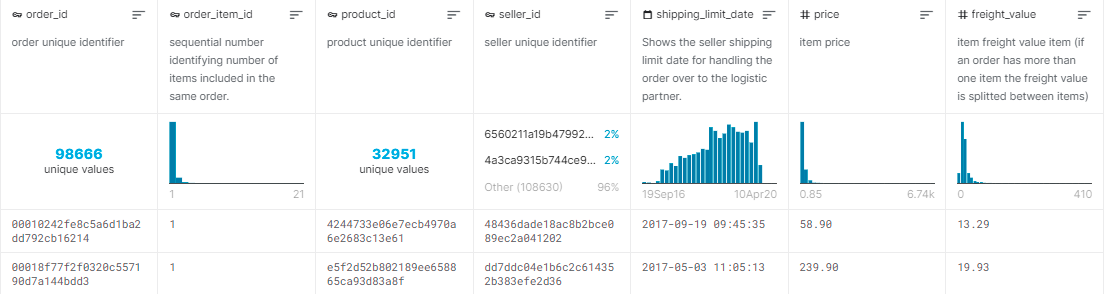


* **Payments Dataset**: 
This dataset includes data about the orders payment options.
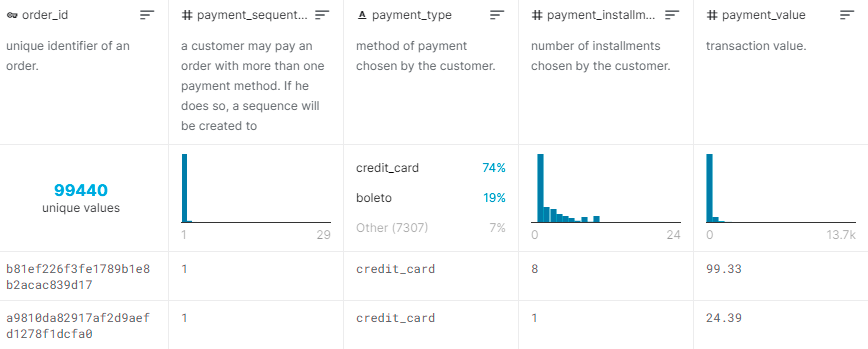


* **Order Reviews Dataset**: 
This dataset includes data about the reviews made by the customers.

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.
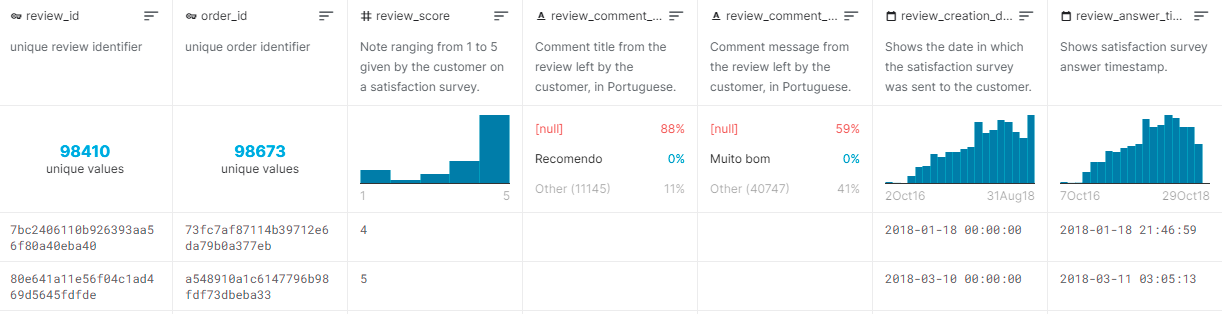


* **Order Dataset**:
This is the core dataset. From each order you might find all other information.
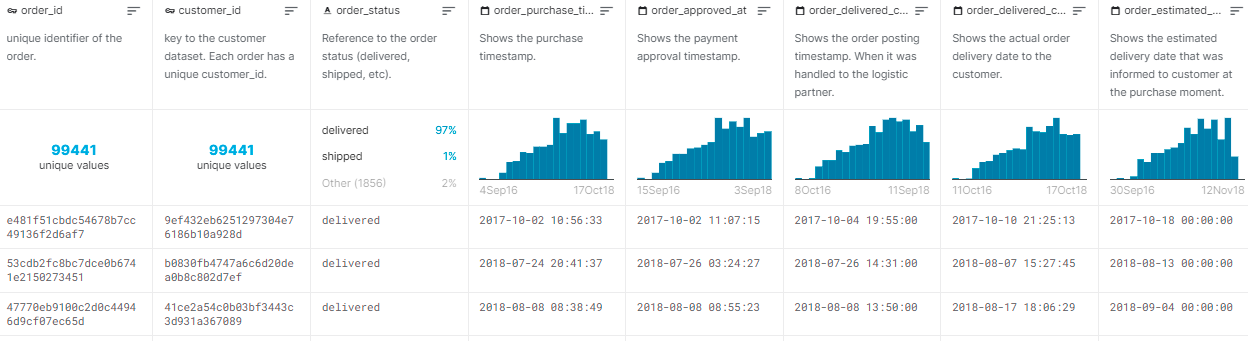


* **Products Dataset**:
This dataset includes data about the products sold by Olist.
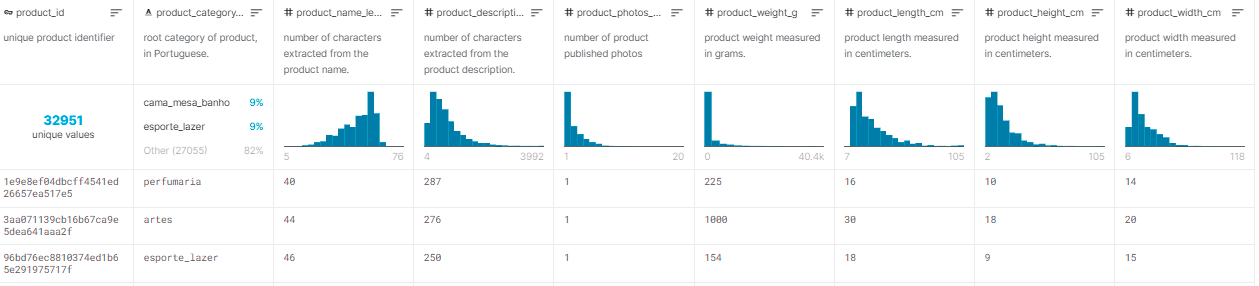


* **Sellers Dataset**:
This dataset includes data about the sellers that fulfilled orders made at Olist. Use it to find the seller location and to identify which seller fulfilled each product.
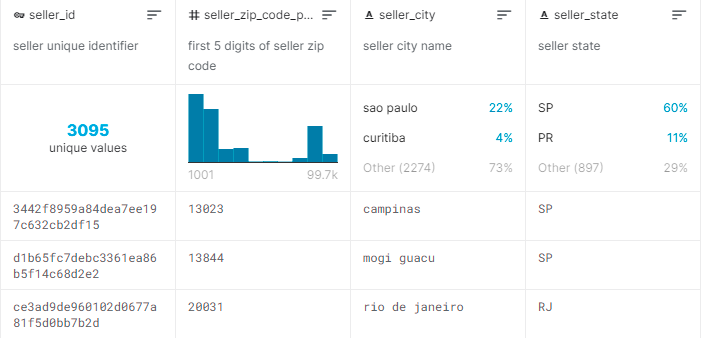


* **Category Name Translation**:
Translates the productcategoryname to english.
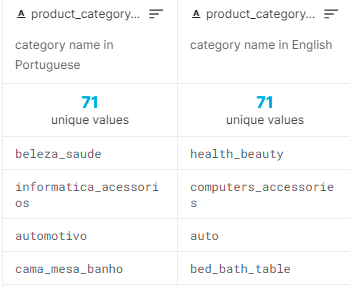

In [5]:
def same_col(folder):
    for i in range(len(folder)):
        files = folder.copy()
        nam = names.copy()
        files.pop(i)
        nam.pop(i)
        for j in range(len(files)):
            for col_a in folder[i].columns.values.tolist():
                for col_b in files[j].columns.values.tolist():
                    if col_a == col_b:
                        print('{}/{}:{}'.format(names[i],nam[j],col_b))
        print('')

same_col(data)

customers/orders:customer_id


orders/customers:customer_id
orders/order_items:order_id
orders/order_payments:order_id
orders/order_reviews:order_id

order_items/orders:order_id
order_items/order_payments:order_id
order_items/order_reviews:order_id
order_items/products:product_id
order_items/sellers:seller_id

order_payments/orders:order_id
order_payments/order_items:order_id
order_payments/order_reviews:order_id

order_reviews/orders:order_id
order_reviews/order_items:order_id
order_reviews/order_payments:order_id

products/order_items:product_id
products/name_translation:product_category_name

sellers/order_items:seller_id

name_translation/products:product_category_name



In [6]:
from collections import Counter
pd_custord = pd.merge(customers,orders)
# print(pd_custord.head())
print(len(Counter(pd_custord.customer_state)))
# Counter(pd_custord.order_status)
print(len(Counter(pd_custord.customer_city)))
pd_custord.isna().sum()

27
4119


customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [7]:
len(Counter(customers.customer_zip_code_prefix))
len(Counter(customers.customer_city))

4119

In [8]:
len(Counter(customers.customer_id))
len(Counter(customers.customer_city))

4119

In [9]:
pd_customers_ord_rev = pd.merge(pd_custord, order_reviews)
pd_customers_ord_rev_pay = pd.merge(pd_customers_ord_rev, order_payments)
pd_customers_ord_rev_pay_it = pd.merge(pd_customers_ord_rev_pay,order_items)
pd_customers_ord_rev_pay_it_prod = pd.merge(pd_customers_ord_rev_pay_it,products)
pd_customers_ord_rev_pay_it_prod_sell = pd.merge(pd_customers_ord_rev_pay_it_prod, sellers)
pd_customers_ord_rev_pay_it_prod_sell_translations= pd.merge(pd_customers_ord_rev_pay_it_prod_sell, name_translation)
pd_customers_ord_rev_pay_it_prod_sell_translations

customer_id                customer_unique_id  \
0       06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1       8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
2       8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
3       f0ac8e5a239118859b1734e1087cbb1f  3c799d181c34d51f6d44bbbc563024db   
4       6bc8d08963a135220ed6c6d098831f84  23397e992b09769faf5e66f9e171a241   
...                                  ...                               ...   
115604  0fbd856ba1d4961786fb54bd448eb7fe  96328ac15f58fbb232fe14b182103382   
115605  98a1b4f80dd0ccb7d1ae5a75ba5c904e  bf5ed75fca98e8f79c49e9a5bf7690e1   
115606  aa0533eb31ed3be79086f11bb2bec430  a490d5875edefe9bb8f5101ec2f6b56f   
115607  d11524bb77c28efad04e4467eac8a660  6968d41eb700f1ea39424e04b854bf7e   
115608  d11524bb77c28efad04e4467eac8a660  6968d41eb700f1ea39424e04b854bf7e   

        customer_zip_code_prefix          customer_city customer_state  \
0                          14409                 franca             SP   
1                          68030               santarem             PA   
2                          68030               santarem             PA   
3                          92480        nova santa rita             RS   
4                          25931                   mage             RJ   
...                          ...                    ...            ...   
115604                     89675          vargem bonita             SC   
115605                     13480                limeira             SP   
115606                     13870  sao joao da boa vista             SP   
115607                     30130         belo horizonte             MG   
115608                     30130         belo horizonte             MG   

                                order_id order_status  \
0       00e7ee1b050b8499577073aeb2a297a1    delivered   
1       c1d2b34febe9cd269e378117d6681172    delivered   
2       c1d2b34febe9cd269e378117d6681172    delivered   
3       b1a5d5365d330d10485e0203d54ab9e8    delivered   
4       2e604b3614664aa66867856dba7e61b7    delivered   
...                                  ...          ...   
115604  937592924b66482b823ee7ecd185d0ff    delivered   
115605  28915ae2a90c218f0c2b7f8e0fb280e0    delivered   
115606  e22a3e8048469ea68906f666d446c25c    delivered   
115607  1ce0acf125f1bcd636276dd213363196    delivered   
115608  1ce0acf125f1bcd636276dd213363196    delivered   

       order_purchase_timestamp    order_approved_at  \
0           2017-05-16 15:05:35  2017-05-16 15:22:12   
1           2017-11-09 00:50:13  2017-11-10 00:47:48   
2           2017-11-09 00:50:13  2017-11-10 00:47:48   
3           2017-05-07 20:11:26  2017-05-08 22:22:56   
4           2018-02-03 19:45:40  2018-02-04 22:29:19   
...                         ...                  ...   
115604      2018-03-31 19:17:43  2018-03-31 19:55:18   
115605      2017-04-09 20:04:37  2017-04-11 03:45:26   
115606      2017-08-28 09:48:01  2017-08-28 10:05:04   
115607      2017-07-31 18:10:29  2017-07-31 18:25:20   
115608      2017-07-31 18:10:29  2017-07-31 18:25:20   

       order_delivered_carrier_date  ... product_description_lenght  \
0               2017-05-23 10:47:57  ...                     1141.0   
1               2017-11-22 01:43:37  ...                     1141.0   
2               2017-11-22 01:43:37  ...                     1141.0   
3               2017-05-19 20:16:31  ...                     1141.0   
4               2018-02-19 18:21:47  ...                     1141.0   
...                             ...  ...                        ...   
115604          2018-04-02 19:10:46  ...                      284.0   
115605          2017-04-12 07:03:58  ...                      194.0   
115606          2017-08-29 11:05:28  ...                      731.0   
115607          2017-08-02 18:22:30  ...                      429.0   
115608          2017-08-02 18:22:30  ...                      42

In [10]:
display(pd_customers_ord_rev_pay_it_prod_sell.order_purchase_timestamp.min())
display(pd_customers_ord_rev_pay_it_prod_sell.order_purchase_timestamp.max())

'2016-09-04 21:15:19'

'2018-09-03 09:06:57'

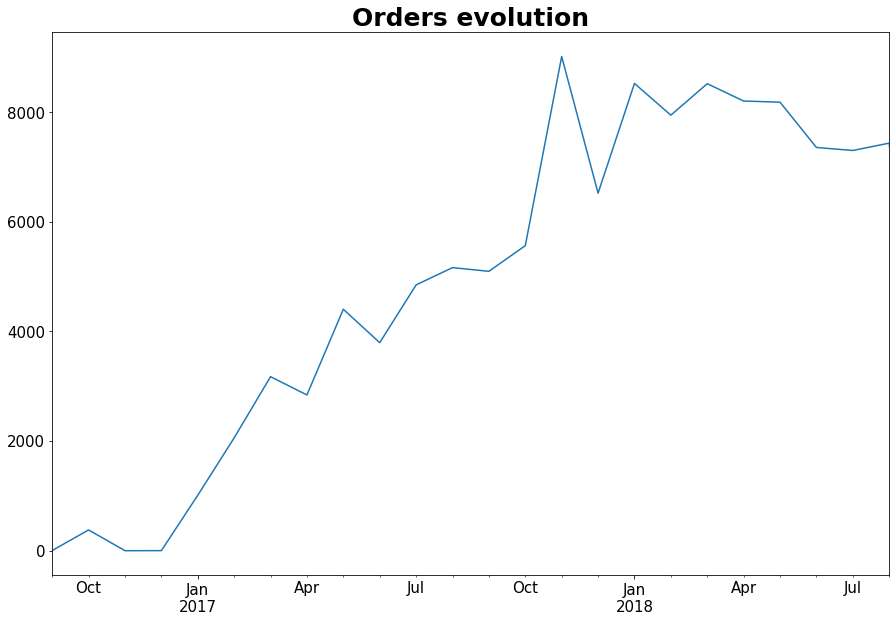

In [11]:
pd_customers_ord_rev_pay_it_prod_sell.order_purchase_timestamp = pd.to_datetime(pd_customers_ord_rev_pay_it_prod_sell.order_purchase_timestamp)
pd_customers_ord_rev_pay_it_prod_sell.set_index('order_purchase_timestamp').resample('M')["order_id"].count().plot()
plt.xlim(pd.Timestamp('2016-09-04'), pd.Timestamp('2018-08-17'))
plt.title('Orders evolution')
plt.xlabel('')
plt.show()

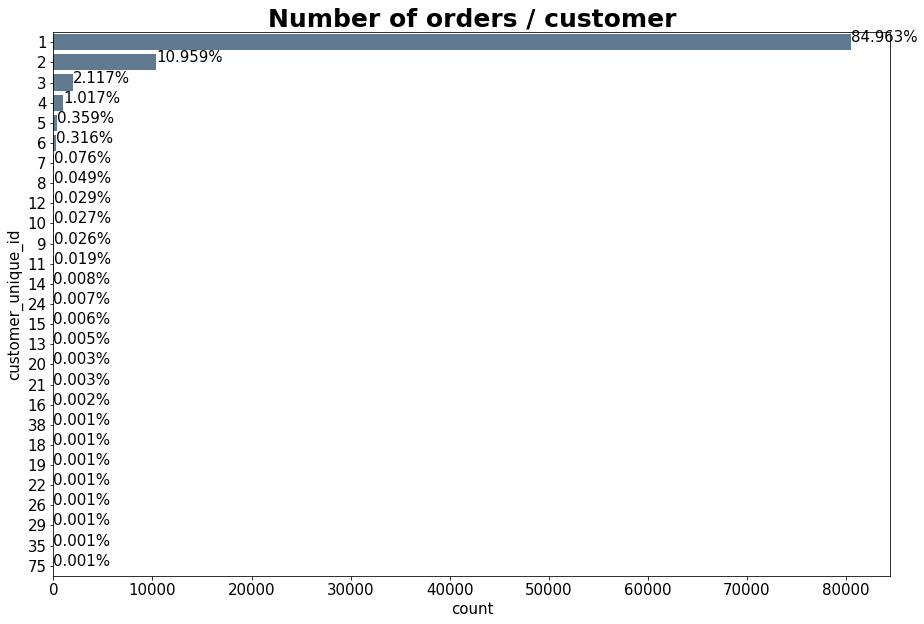

In [12]:
data_count = pd_customers_ord_rev_pay_it_prod_sell['customer_unique_id'].value_counts().reset_index()

ax = sns.countplot(data=data_count, y='customer_unique_id', color="#315a7d", alpha=.8, 
              order=data_count['customer_unique_id'].value_counts(ascending=False).index, orient='horizontal')
ax.set_title("Number of orders / customer")

for p in ax.patches:
            percentage = '{:.3f}%'.format(100 * p.get_width()/len(data_count['customer_unique_id']))
            x = p.get_x() + p.get_width()
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y), fontsize=15)
plt.show()

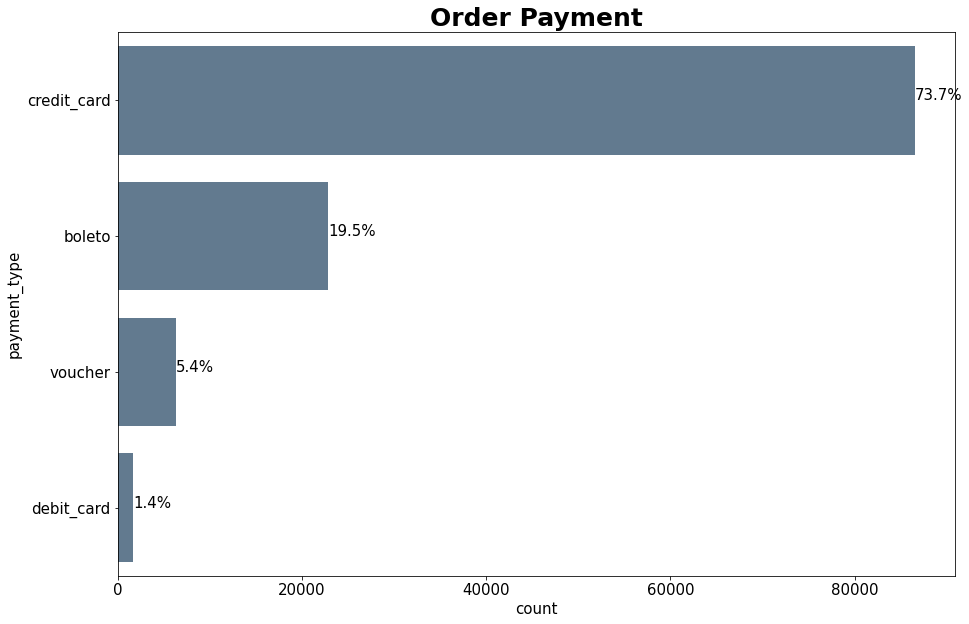

In [13]:
ax = sns.countplot(data=pd_customers_ord_rev_pay_it_prod_sell, y='payment_type', color="#315a7d", alpha=.8, 
              order=pd_customers_ord_rev_pay_it_prod_sell['payment_type'].value_counts().index, orient='horizontal')
ax.set_title("Order Payment")

for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/len(pd_customers_ord_rev_pay_it_prod_sell))
            x = p.get_x() + p.get_width()
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y), fontsize=15)
plt.show()

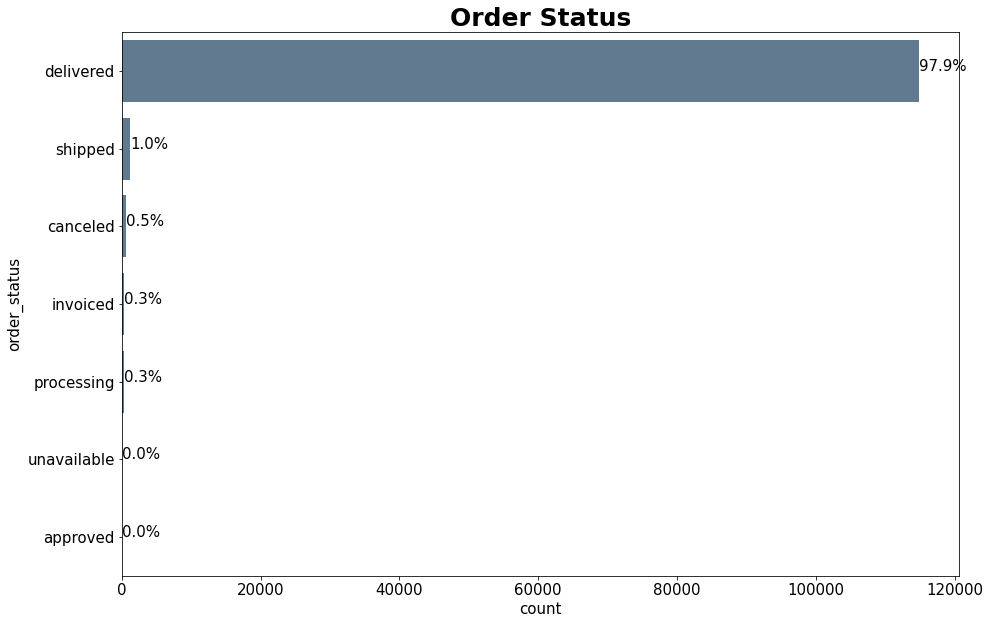

In [14]:
ax = sns.countplot(data=pd_customers_ord_rev_pay_it_prod_sell, y='order_status', color="#315a7d", alpha=.8, 
              order=pd_customers_ord_rev_pay_it_prod_sell['order_status'].value_counts().index, orient='horizontal')
ax.set_title("Order Status")

for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/len(pd_customers_ord_rev_pay_it_prod_sell))
            x = p.get_x() + p.get_width()
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y), fontsize=15)
plt.show()

In [15]:
pd_customers_ord_rev_pay_it_prod_sell_translations['product_category_name_english'].replace({
       'housewares':'appliances', 'perfumery':'health_beauty', 'pet_shop':'pets', 'stationery':'office',
       'furniture_decor':'home', 'office_furniture':'office', 'garden_tools':'garden', 
       'computers_accessories':'electronics', 'bed_bath_table':'home', 'telephony':'electronics', 
       'construction_tools_construction':'construction', 'baby':'health_beauty', 'cool_stuff':'others', 
       'watches_gifts':'fashion', 'air_conditioning':'construction', 'books_general_interest':'culture',
       'small_appliances':'appliances', 'luggage_accessories':'sports_leisure', 'fashion_underwear_beach':'fashion', 
       'christmas_supplies':'home', 'fashion_bags_accessories':'fashion', 'musical_instruments':'hobbies',
       'construction_tools_lights':'construction', 'books_technical':'culture', 'market_place':'others',
       'costruction_tools_garden':'construction', 'home_appliances':'home', 'security_and_services':'office',
       'agro_industry_and_commerce':'office', 'party_supplies':'hobbies', 'home_confort':'home',
       'cds_dvds_musicals':'culture', 'industry_commerce_and_business':'office', 'consoles_games':'electronics', 
       'furniture_bedroom':'home', 'construction_tools_safety':'construction', 'fixed_telephony':'electronics', 
       'drinks':'food', 'kitchen_dining_laundry_garden_furniture':'home', 'fashion_shoes':'fashion',
       'home_construction':'construction', 'audio':'electronics', 'home_appliances_2':'home',
       'fashion_male_clothing':'fashion', 'cine_photo':'culture', 'furniture_living_room':'home',
       'art':'culture', 'food_drink':'food', 'tablets_printing_image':'electronics', 'fashion_sport':'fashion',
       'la_cuisine':'home', 'flowers':'garden', 'computers':'electronics', 'home_comfort_2':'home',
       'small_appliances_home_oven_and_coffee':'appliances', 'dvds_blu_ray':'culture', 'music':'culture',
       'costruction_tools_tools':'construction', 'fashio_female_clothing':'fashion',
       'furniture_mattress_and_upholstery':'home', 'signaling_and_security':'office',
       'diapers_and_hygiene':'health_beauty', 'books_imported':'culture', 'arts_and_craftmanship':'culture',
       'fashion_childrens_clothes':'fashion'}, inplace=True)

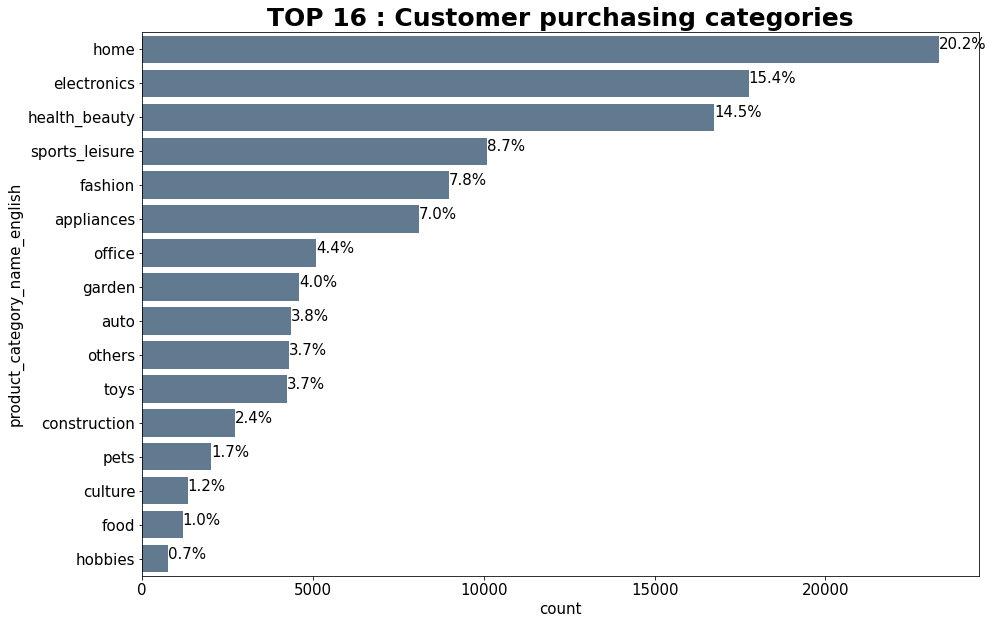

In [16]:
ax = sns.countplot(data=pd_customers_ord_rev_pay_it_prod_sell_translations, y='product_category_name_english', color="#315a7d", alpha=.8, 
              order=pd_customers_ord_rev_pay_it_prod_sell_translations['product_category_name_english'].value_counts().index[:20], orient='horizontal')
ax.set_title("TOP 16 : Customer purchasing categories")

for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/len(pd_customers_ord_rev_pay_it_prod_sell_translations))
            x = p.get_x() + p.get_width()
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y), fontsize=15)
plt.show()

In [17]:
# pd_customers_ord_rev_pay_it_prod_sell.info()
# len(Counter(customers.customer_id))
def countbycat(dataframe, col):
    unique, countby = np.unique(dataframe[col], return_counts=True)
    df = pd.DataFrame(countby, unique, columns=dict(Count=countby)).sort_values(by='Count', ascending=False)
    return df

countbycat(pd_customers_ord_rev_pay_it_prod_sell,'customer_unique_id')
# identification des clients réguliers

Count
9a736b248f67d166d2fbb006bcb877c3     75
6fbc7cdadbb522125f4b27ae9dee4060     38
f9ae226291893fda10af7965268fb7f6     35
8af7ac63b2efbcbd88e5b11505e8098a     29
569aa12b73b5f7edeaa6f2a01603e381     26
...                                 ...
5b9a423471efacaa2b6d3ff74db0a572      1
5b99cd9116cb95dca128af1688ceb0bc      1
5b99b037dd23d71e703eeb9a1f643cda      1
5b990a40f0cc96373130487e69d4345f      1
ffffd2657e2aad2907e67c3e9daecbeb      1

[94720 rows x 1 columns]

<AxesSubplot:>

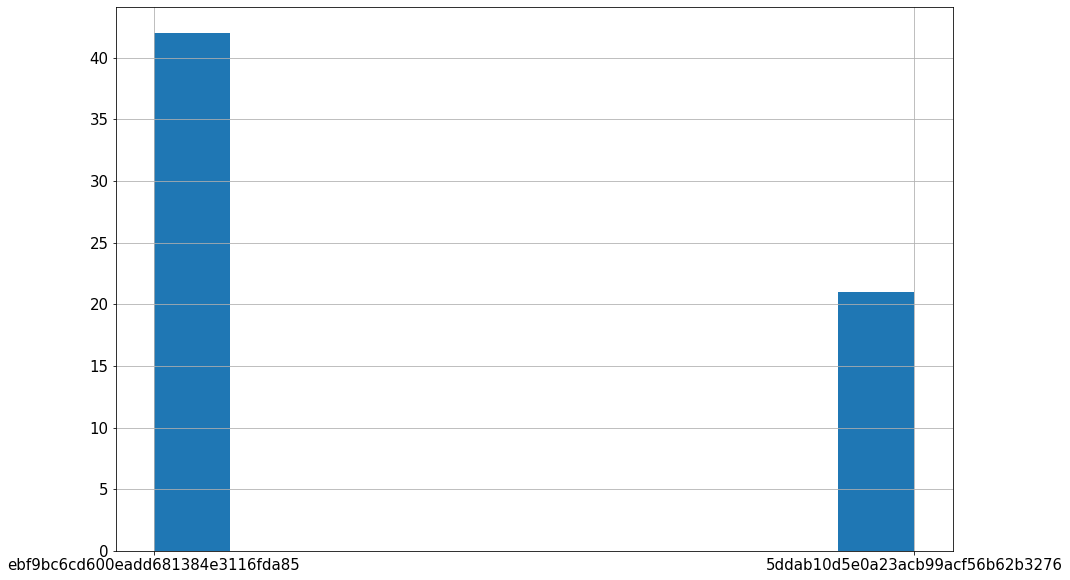

In [18]:
countbycat(pd_customers_ord_rev_pay_it_prod_sell,'order_id')
pd_customers_ord_rev_pay_it_prod_sell[pd_customers_ord_rev_pay_it_prod_sell['order_id']=='895ab968e7bb0d5659d16cd74cd1650c']['product_id'].hist()
# customers[customers['customer_id']=='270c23a11d024a44c896d1894b261a83']
# countbycat(products, 'product_category_name')
# name_translation

# 1 customer id est associé à 1 order id ==> chaque commande est associé à un id client unique
# 1 customer_unique_id peut être associé à plusieurs_order_id/ et product_id => un client peut faire plusieurs commandes (order_id) et commander plusieurs produits (product_id)
# 1 order id + customer_id peut être associé à plusieurs product_id => plusieurs produits différents + un même produits plusieurs fois

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
review_id                             0
review_score                          0
review_comment_title             101808
review_comment_message            66703
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
order_item_id                         0
product_id                            0
seller_id                             0


<AxesSubplot:>

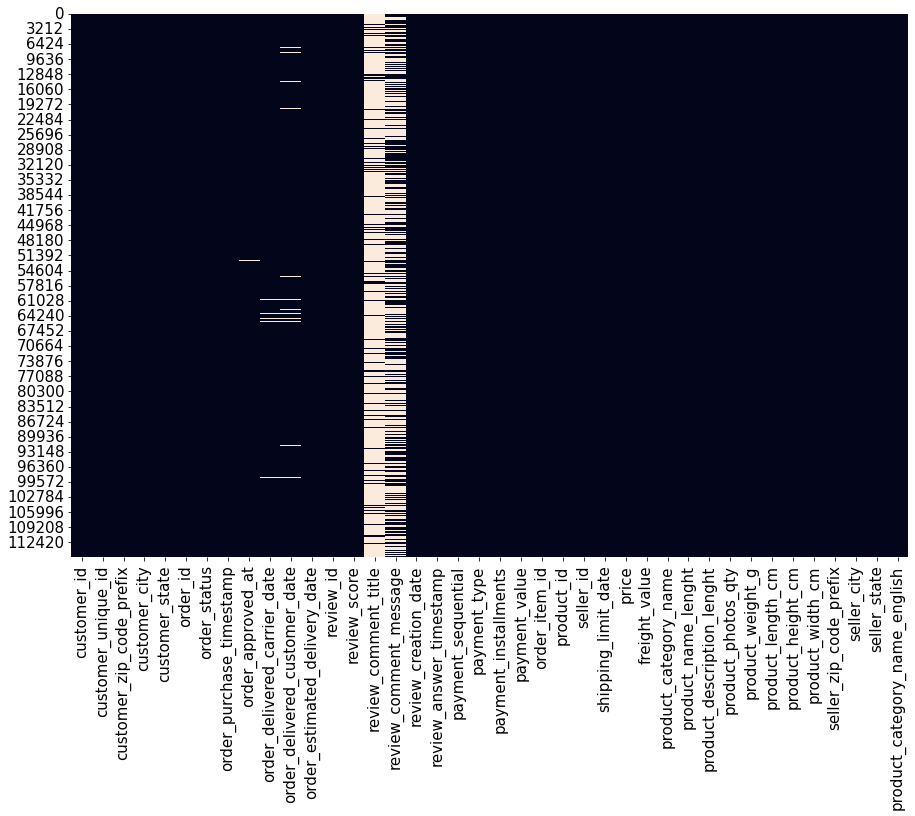

In [19]:
print(pd_customers_ord_rev_pay_it_prod_sell_translations.isna().sum())
# sns.heatmap(pd_customers_ord_rev_pay_it_prod_sell.isna(), cbar=False)
sns.heatmap(pd_customers_ord_rev_pay_it_prod_sell_translations.isna(),cbar=False)

In [20]:
# vérfier les doublons
dataa = data.copy()
dataa.pop(1)
for file in dataa:
    print(file.duplicated().sum())

0
0
0
0
0
0
0
0


In [21]:
# retirer les variables qui ne nous intéressent pas
reviews_clean = order_reviews.drop(['review_comment_title','review_comment_message','review_answer_timestamp'], axis=1)
product_clean = products[['product_id','product_category_name','product_photos_qty']]
order_clean = orders.drop(['order_approved_at','order_delivered_carrier_date'], axis=1)
order_clean = pd.merge(order_clean, order_items)

# merge des fichiers cleans
pd_clean = pd.merge(customers, order_clean)
pd_clean = pd.merge(pd_clean, reviews_clean)
pd_clean = pd.merge(pd_clean, order_payments)
pd_clean = pd.merge(pd_clean,product_clean)
pd_clean = pd.merge(pd_clean, sellers)
pd_clean = pd.merge(pd_clean, name_translation)

<AxesSubplot:>

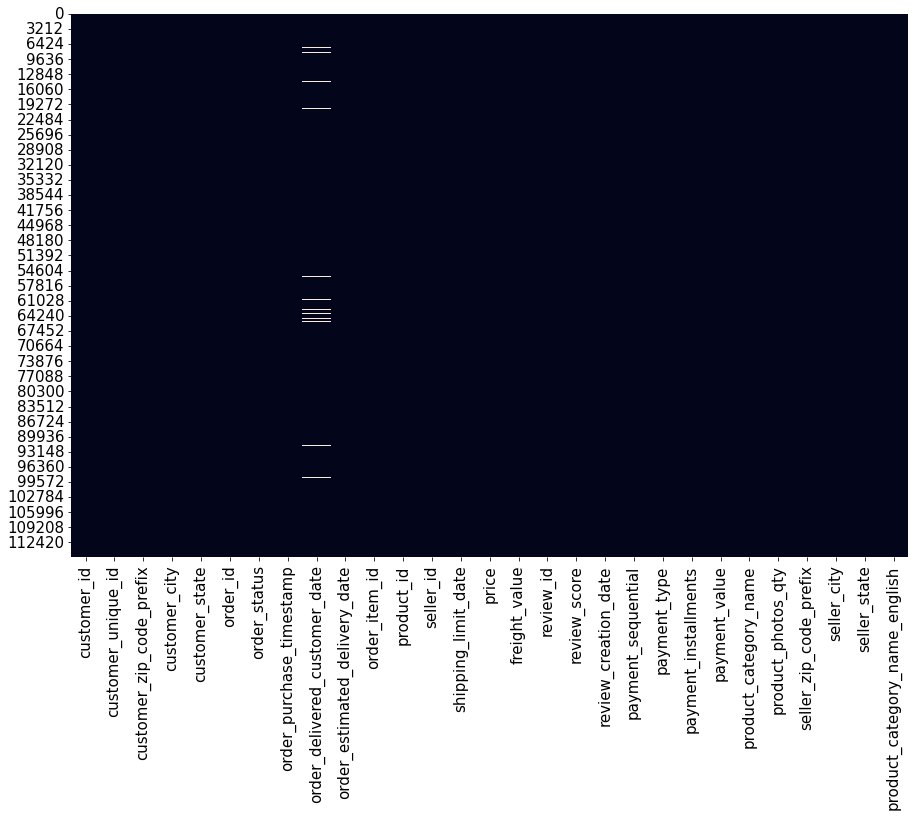

In [22]:
sns.heatmap(pd_clean.isna(), cbar=False)

In [23]:
# conversion des colonnes dates
pd_clean.filter(like='date', axis=1)

def col2datetime(df):
    datelist = df.filter(like='date', axis=1).columns.values.tolist()
    for col in datelist:
        df[col] = pd.to_datetime(df[col])
    return df

pd_clean = col2datetime(pd_clean)
pd_clean.filter(like='date', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_delivered_customer_date  113209 non-null  datetime64[ns]
 1   order_estimated_delivery_date  115609 non-null  datetime64[ns]
 2   shipping_limit_date            115609 non-null  datetime64[ns]
 3   review_creation_date           115609 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 4.4 MB


In [24]:
df = pd_clean
df = df.drop_duplicates(subset={'order_id','customer_id','order_purchase_timestamp','order_delivered_customer_date'})

# Calcul de la fréquence rFm
df['total_pay'] = df.payment_value * df.payment_installments
freq = df.groupby('customer_unique_id')['order_id'].count()

# Calcul de la monetary rfM
totalpaybycust = df.groupby('customer_unique_id')['payment_value'].sum()
totalpaybycust = totalpaybycust.reset_index(level='customer_unique_id', name='monetary')
pd_rfm = pd.merge(freq, totalpaybycust, on='customer_unique_id').rename(columns={'order_id':'frequency'})
pd_rfm.sort_values(ascending=False, by='monetary')
totalpaybycust

C:\Users\ibrah\AppData\Local\Temp/ipykernel_10972/2153796196.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_pay'] = df.payment_value * df.payment_installments


customer_unique_id  monetary
0      0000366f3b9a7992bf8c76cfdf3221e2    141.90
1      0000b849f77a49e4a4ce2b2a4ca5be3f     27.19
2      0000f46a3911fa3c0805444483337064     86.22
3      0000f6ccb0745a6a4b88665a16c9f078     43.62
4      0004aac84e0df4da2b147fca70cf8255    196.89
...                                 ...       ...
93391  fffcf5a5ff07b0908bd4e2dbc735a684   2067.42
93392  fffea47cd6d3cc0a88bd621562a9d061     84.58
93393  ffff371b4d645b6ecea244b27531430a    112.46
93394  ffff5962728ec6157033ef9805bacc48    133.69
93395  ffffd2657e2aad2907e67c3e9daecbeb     71.56

[93396 rows x 2 columns]

In [25]:
# Calcul de la recency Rfm
df_sort = df.sort_values(ascending=False, by='order_purchase_timestamp')
df_recency = df_sort.groupby('customer_unique_id')['order_purchase_timestamp'].first().sort_values()
df_rec = df_recency.copy()
df_recency = df_rec.reset_index(level='customer_unique_id', name='more_recent_purchase_date')
df_recency['more_recent_purchase_date'] = pd.to_datetime(df_recency['more_recent_purchase_date'])
max_date = pd.to_datetime(max(df['order_purchase_timestamp']))

print(df_recency.tail())
print(max_date)

df_recency['recency']= (max_date-df_recency['more_recent_purchase_date']).dt.days
# df_recency.sort_values(by='more_recent_purchase_date')

pd_rfm = pd.merge(pd_rfm,df_recency.drop('more_recent_purchase_date',axis=1))
pd_rfm
# df_recency[df_recency['diff_days']==0]
# type(df.order_purchase_timestamp[1])
# df_recency.info()
# df_recency.info()


                     customer_unique_id more_recent_purchase_date
93391  5c58de6fb80e93396e2f35642666b693       2018-08-29 14:18:23
93392  7febafa06d9d8f232a900a2937f04338       2018-08-29 14:18:28
93393  b701bebbdf478f5500348f03aff62121       2018-08-29 14:52:00
93394  24ac2b4327e25baf39f2119e4228976a       2018-08-29 15:00:37
93395  ff22e30958c13ffe219db7d711e8f564       2018-09-03 09:06:57
2018-09-03 09:06:57


customer_unique_id  frequency  monetary  recency
0      0000366f3b9a7992bf8c76cfdf3221e2          1    141.90      115
1      0000b849f77a49e4a4ce2b2a4ca5be3f          1     27.19      118
2      0000f46a3911fa3c0805444483337064          1     86.22      541
3      0000f6ccb0745a6a4b88665a16c9f078          1     43.62      325
4      0004aac84e0df4da2b147fca70cf8255          1    196.89      292
...                                 ...        ...       ...      ...
93391  fffcf5a5ff07b0908bd4e2dbc735a684          1   2067.42      451
93392  fffea47cd6d3cc0a88bd621562a9d061          1     84.58      266
93393  ffff371b4d645b6ecea244b27531430a          1    112.46      572
93394  ffff5962728ec6157033ef9805bacc48          1    133.69      123
93395  ffffd2657e2aad2907e67c3e9daecbeb          1     71.56      488

[93396 rows x 4 columns]

C:\Users\ibrah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ibrah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ibrah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

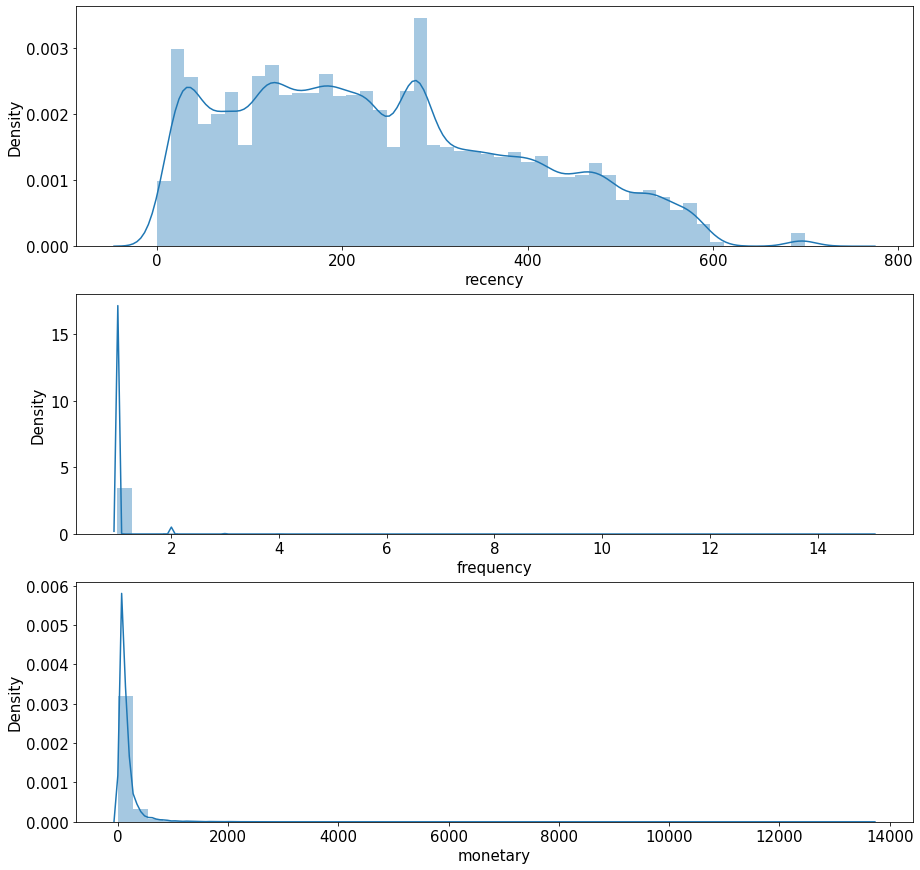

In [26]:
plt.figure(figsize=(15,15))
plt.subplot(3, 1, 1); sns.distplot(pd_rfm['recency'])
plt.subplot(3, 1, 2); sns.distplot(pd_rfm['frequency'])
plt.subplot(3, 1, 3); sns.distplot(pd_rfm['monetary'])
plt.show()


C:\Users\ibrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ibrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ibrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


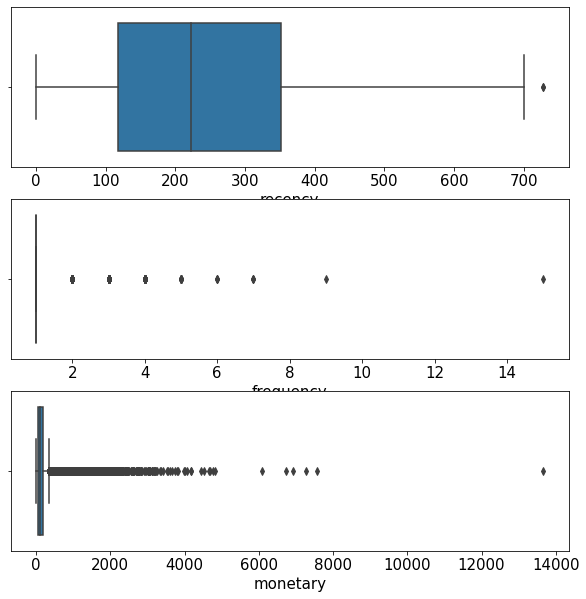

In [27]:
# Outliers check in
plt.figure(figsize=(10,10))
plt.subplot(3, 1, 1); sns.boxplot(pd_rfm['recency'])
plt.subplot(3, 1, 2); sns.boxplot(pd_rfm['frequency'])
plt.subplot(3, 1, 3); sns.boxplot(pd_rfm['monetary'])
plt.show()

In [28]:
# Gestion des outliers for monetary
Q1 = pd_rfm.monetary.quantile(0.05)
Q3 = pd_rfm.monetary.quantile(0.95)
IQ = Q3-Q1
pd_rfm=pd_rfm[(pd_rfm['monetary']>=Q1-1.5*IQ) & (pd_rfm['monetary']<=Q3+1.5*IQ)]

C:\Users\ibrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ibrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ibrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


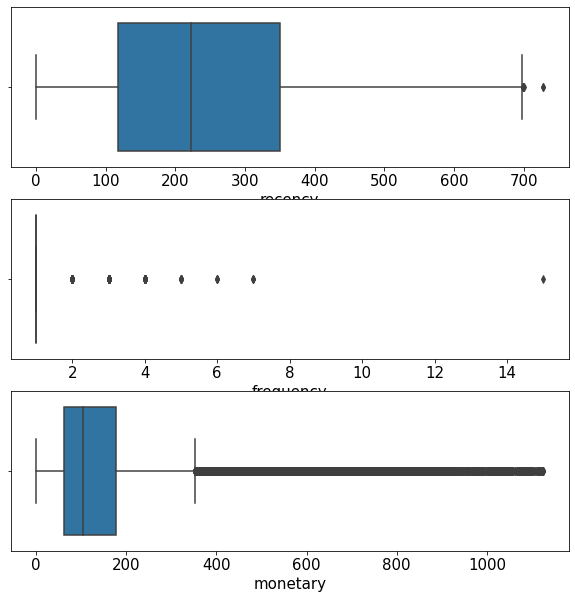

In [29]:
# Outliers check in
plt.figure(figsize=(10,10))
plt.subplot(3, 1, 1); sns.boxplot(pd_rfm['recency'])
plt.subplot(3, 1, 2); sns.boxplot(pd_rfm['frequency'])
plt.subplot(3, 1, 3); sns.boxplot(pd_rfm['monetary'])
plt.show()

In [30]:
import sys
!{sys.executable} -m pip install yellowbrick==0.9.1 scikit-learn==0.22.2

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pd_rfm_scaled = pd_rfm[['monetary', 'frequency', 'recency']]
scaler = StandardScaler()

# fit_transform
pd_rfm_scaled = pd.DataFrame(scaler.fit_transform(pd_rfm_scaled), columns=['monetary', 'frequency', 'recency'])
pd_rfm_scaled.describe()

monetary     frequency       recency
count  9.252800e+04  9.252800e+04  9.252800e+04
mean   1.891608e-17  3.156595e-15 -5.271544e-17
std    1.000005e+00  1.000005e+00  1.000005e+00
min   -1.021776e+00 -1.604458e-01 -1.578911e+00
25%   -6.015420e-01 -1.604458e-01 -8.081940e-01
50%   -2.975882e-01 -1.604458e-01 -1.289179e-01
75%    2.007171e-01 -1.604458e-01  7.071143e-01
max    6.725777e+00  6.845634e+01  3.176022e+00

monetary  frequency   recency
monetary   1.000000   0.157585 -0.007918
frequency  0.157585   1.000000 -0.020878
recency   -0.007918  -0.020878  1.000000

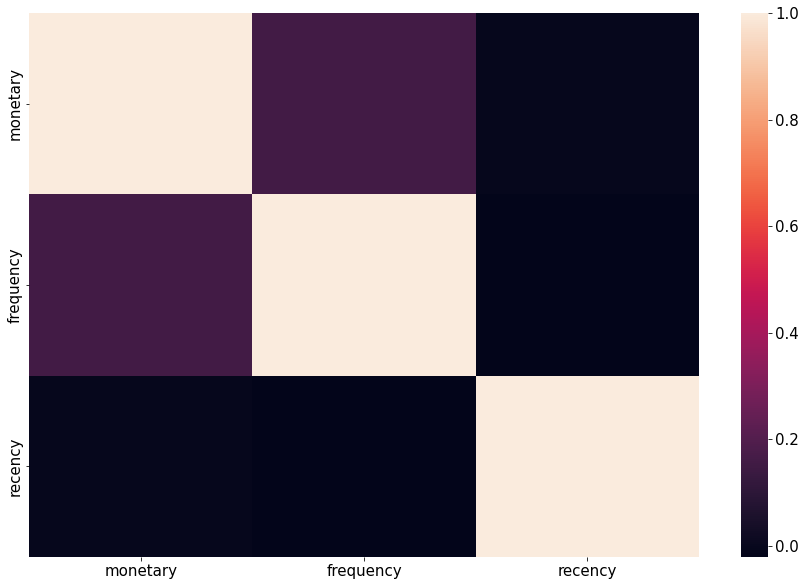

In [32]:
sns.heatmap(pd_rfm_scaled.corr())
pd_rfm_scaled.corr()
# à priori on ne peut pas établir de liens entre les 3 paramètres

In [33]:
# K means clustering for RFM 
k_means = KMeans(n_clusters=4, max_iter=50)
k_means.fit(pd_rfm_scaled)
Counter(k_means.labels_)

Counter({0: 48063, 2: 35504, 1: 6217, 3: 2744})

In [34]:
ssd = []
sscores = []
cluster_lab_max = []

for i in range(1,10):
    print(i)
    n=i+1
    k_means = KMeans(n_clusters=n, max_iter=50).fit(pd_rfm_scaled)
    cluster_labels = k_means.labels_
    # silhouette score
    silhouette_avg = silhouette_score(pd_rfm_scaled, cluster_labels)    
    ssd.append(k_means.inertia_)
    sscores.append(silhouette_avg)
    max_score = max(sscores)
    if max_score < silhouette_avg:
        n_cluster_max = i+1
        max_score = silhouette_avg
        cluster_lab_max = cluster_labels


print(max_score)
print(Counter(cluster_lab_max))
# inertia : Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

1
2
3
4
5
6
7
8
9
0.7190496675413108
Counter()


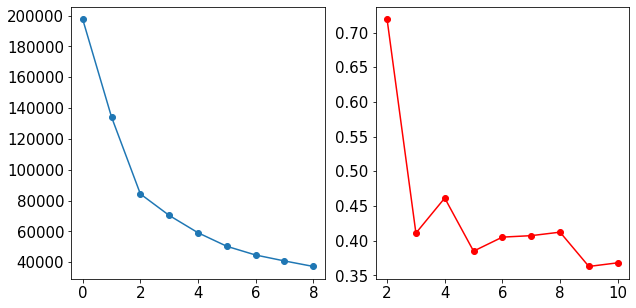

In [35]:
n_clusters = np.arange(2,11)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1);plt.plot(ssd, '-o')
plt.subplot(1,2,2);plt.plot(n_clusters,sscores, 'r-o')

In [36]:
# from yellowbrick.cluster import silhouette_visualizer

# k_means2 = KMeans(2,max_iter=50)
# silhouette_visualizer(k_means2,pd_rfm_scaled,colors='yellowbrick')


C:\Users\ibrah\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


ImportError: cannot import name 'silhouette_visualizer' from 'yellowbrick.cluster' (C:\Users\ibrah\anaconda3\lib\site-packages\yellowbrick\cluster\__init__.py)

In [ ]:
# k_means4 = KMeans(4, max_iter=50)
# silhouette_visualizer(k_means,pd_rfm_scaled,colors='yellowbrick')

In [37]:
k_means4 = k_means
pd_rfm['clusters']= k_means4.labels_
pd_rfm.head()

C:\Users\ibrah\AppData\Local\Temp/ipykernel_10972/1764420639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_rfm['clusters']= k_means4.labels_


customer_unique_id  frequency  monetary  recency  clusters
0  0000366f3b9a7992bf8c76cfdf3221e2          1    141.90      115         1
1  0000b849f77a49e4a4ce2b2a4ca5be3f          1     27.19      118         1
2  0000f46a3911fa3c0805444483337064          1     86.22      541         0
3  0000f6ccb0745a6a4b88665a16c9f078          1     43.62      325         9
4  0004aac84e0df4da2b147fca70cf8255          1    196.89      292         9

<AxesSubplot:xlabel='clusters', ylabel='frequency'>

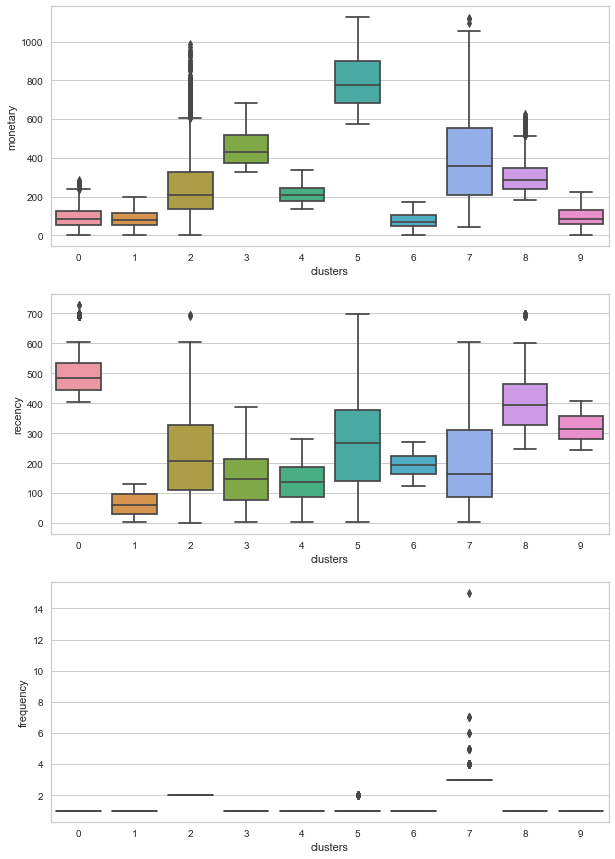

In [38]:
plt.figure(figsize=(10,15))
plt.subplot(311); sns.boxplot(x='clusters', y='monetary', data=pd_rfm)
plt.subplot(312); sns.boxplot(x='clusters', y='recency', data=pd_rfm)
plt.subplot(313); sns.boxplot(x='clusters', y='frequency', data=pd_rfm)

<AxesSubplot:xlabel='clusters', ylabel='frequency'>

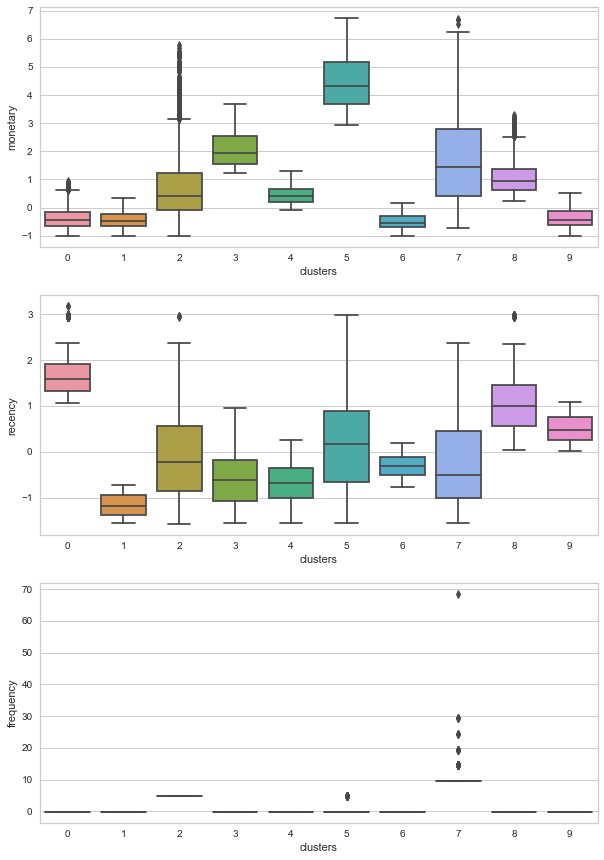

In [39]:
plt.figure(figsize=(10,15))
pd_rfm_scaled['clusters']= k_means4.labels_
plt.subplot(311); sns.boxplot(x='clusters', y='monetary', data=pd_rfm_scaled)
plt.subplot(312); sns.boxplot(x='clusters', y='recency', data=pd_rfm_scaled)
plt.subplot(313); sns.boxplot(x='clusters', y='frequency', data=pd_rfm_scaled)

<AxesSubplot:xlabel='recency', ylabel='monetary'>

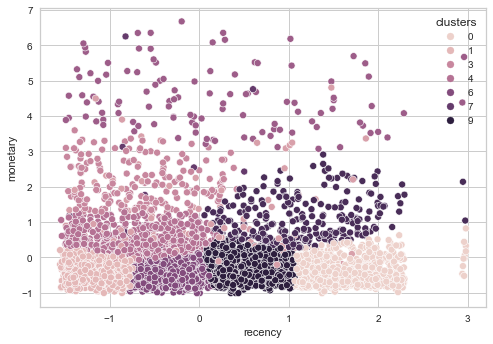

In [40]:
sns.scatterplot(x='recency',y='monetary',data=pd_rfm_scaled[:5000],hue='clusters')

<AxesSubplot:xlabel='monetary', ylabel='frequency'>

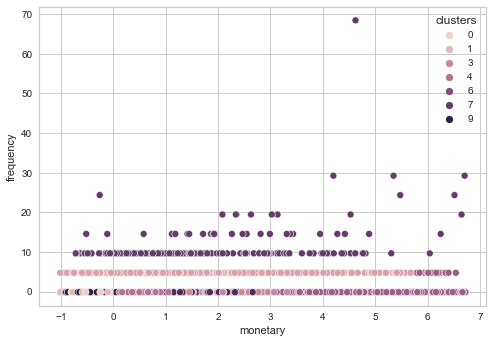

In [41]:
sns.scatterplot(x='monetary',y='frequency',data=pd_rfm_scaled,hue='clusters')

In [42]:
df_test = pd_clean[pd_clean.customer_unique_id == '0a0a92112bd4c708ca5fde585afaa872'][['order_item_id','price','freight_value','payment_value']]
df_test['total_purchase_price'] = df_test.order_item_id*(df_test.price + df_test.freight_value)
df_test
# df_test['total_purchase_price'] = total_item_price* df_test.order_item_id

order_item_id   price  freight_value  payment_value  \
104870              1  1680.0          28.01       13664.08   
104871              2  1680.0          28.01       13664.08   
104872              3  1680.0          28.01       13664.08   
104873              4  1680.0          28.01       13664.08   
104874              5  1680.0          28.01       13664.08   
104875              6  1680.0          28.01       13664.08   
104876              7  1680.0          28.01       13664.08   
104877              8  1680.0          28.01       13664.08   

        total_purchase_price  
104870               1708.01  
104871               3416.02  
104872               5124.03  
104873               6832.04  
104874               8540.05  
104875              10248.06  
104876              11956.07  
104877              13664.08

In [43]:
# extraire les lignes associées à customer_unique_id
# explication du paiement séquentiel
df[df.customer_unique_id == '9a736b248f67d166d2fbb006bcb877c3'].iloc[:,9:19]
df[df.customer_unique_id == '9a736b248f67d166d2fbb006bcb877c3']
df_9a = df[df.customer_unique_id == '9a736b248f67d166d2fbb006bcb877c3'].loc[df['customer_id']=='7cfe09e5bc5e9f1fab1a57d8ddd8eaee'][['order_purchase_timestamp','payment_sequential','payment_installments','payment_value','total_pay','order_purchase_timestamp','freight_value','price']].sort_values(ascending=True, by='payment_sequential')
df_9a['total_pay_cum']=df_9a.total_pay.cumsum()
df_9a['total_price']=df_9a.price + df_9a.freight_value
df_9a
# df.groupby('customer_unique_id')['order_item_id'].sum().sort_values(ascending=False)

order_purchase_timestamp  payment_sequential  payment_installments  \
6774      2017-07-27 12:50:46                   7                     1   

      payment_value  total_pay order_purchase_timestamp  freight_value  price  \
6774           1.27       1.27      2017-07-27 12:50:46          26.97   45.2   

      total_pay_cum  total_price  
6774           1.27        72.17

In [44]:
df[df.customer_unique_id == '8d50f5eadf50201ccdcedfb9e2ac8455']['total_pay'].sum()

1301.7200000000003

In [45]:
# extraire les lignes associées à customer_unique_id
# explication du paiement séquentiel
df[df.customer_unique_id == '9a736b248f67d166d2fbb006bcb877c3'].iloc[:,9:19]
df[df.customer_unique_id == '9a736b248f67d166d2fbb006bcb877c3']
df_9a = df[df.customer_unique_id == '9a736b248f67d166d2fbb006bcb877c3'].loc[df['customer_id']=='7cfe09e5bc5e9f1fab1a57d8ddd8eaee'][['order_purchase_timestamp','payment_sequential','payment_installments','payment_value','total_pay','order_purchase_timestamp','freight_value','price']].sort_values(ascending=True, by='payment_sequential')
df_9a['total_pay_cum']=df_9a.total_pay.cumsum()
df_9a['total_price']=df_9a.price + df_9a.freight_value
df_9a
# df.groupby('customer_unique_id')['order_item_id'].sum().sort_values(ascending=False)

order_purchase_timestamp  payment_sequential  payment_installments  \
6774      2017-07-27 12:50:46                   7                     1   

      payment_value  total_pay order_purchase_timestamp  freight_value  price  \
6774           1.27       1.27      2017-07-27 12:50:46          26.97   45.2   

      total_pay_cum  total_price  
6774           1.27        72.17

In [69]:
product_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32341 non-null  object 
 2   product_photos_qty     32341 non-null  float64
dtypes: float64(1), object(2)
memory usage: 772.4+ KB


In [133]:
pd_customers_ord_rev_pay_it_prod_sell_translations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115609 non-null  object 
 1   customer_unique_id             115609 non-null  object 
 2   customer_zip_code_prefix       115609 non-null  int64  
 3   customer_city                  115609 non-null  object 
 4   customer_state                 115609 non-null  object 
 5   order_id                       115609 non-null  object 
 6   order_status                   115609 non-null  object 
 7   order_purchase_timestamp       115609 non-null  object 
 8   order_approved_at              115595 non-null  object 
 9   order_delivered_carrier_date   114414 non-null  object 
 10  order_delivered_customer_date  113209 non-null  object 
 11  order_estimated_delivery_date  115609 non-null  object 
 12  review_id                     

In [134]:
# pd_custord = pd.merge(customers,orders)
# pd_customers_ord_rev = pd.merge(pd_custord, order_reviews)
# pd_customers_ord_rev_pay = pd.merge(pd_customers_ord_rev, order_payments)
# pd_customers_ord_rev_pay_it = pd.merge(pd_customers_ord_rev_pay,order_items)
# pd_customers_ord_rev_pay_it_prod = pd.merge(pd_customers_ord_rev_pay_it,products)
# pd_customers_ord_rev_pay_it_prod_sell = pd.merge(pd_customers_ord_rev_pay_it_prod, sellers)
# pd_customers_ord_rev_pay_it_prod_sell_translations= pd.merge(pd_customers_ord_rev_pay_it_prod_sell, name_translation)
# pd_customers_ord_rev_pay_it_prod_sell_translations

# # retirer les variables qui ne nous intéressent pas
# reviews_clean = order_reviews.drop(['review_comment_title','review_comment_message','review_answer_timestamp'], axis=1)
# product_clean = products[['product_id','product_category_name','product_photos_qty']]
# order_clean = orders.drop(['order_approved_at','order_delivered_carrier_date'], axis=1)
# order_clean = pd.merge(order_clean, order_items)

# # merge des fichiers cleans
# pd_clean = pd.merge(customers, order_clean)
# pd_clean = pd.merge(pd_clean, reviews_clean)
# pd_clean = pd.merge(pd_clean, order_payments)
# pd_clean = pd.merge(pd_clean,product_clean)
# pd_clean = pd.merge(pd_clean, sellers)
# pd_clean = pd.merge(pd_clean, name_translation)
# customers=customers.drop_duplicates(inplace=True)
# products=products.drop_duplicates(inplace=True)
# print(type(customers))
# print(type(products))


#Number of products purchased
number_of_products_purchased = pd_customers_ord_rev_pay_it_prod_sell_translations.groupby('customer_unique_id')['product_id'].count()
number_of_products_purchased.name = 'number_of_products_purchased'

sample_conversion = pd.merge(pd_customers_ord_rev_pay_it_prod_sell_translations, number_of_products_purchased, on='customer_unique_id', how='left')

#Best categ.
# customers_products = pd.merge(customers_orders, data['products'], on='product_id', how='left')
# customers_category = pd.merge(customers_products, data['product_category'], on='product_category_name', how='left')

category_type_table = pd.pivot_table(pd_customers_ord_rev_pay_it_prod_sell_translations, index='customer_unique_id', 
                                    columns='product_category_name_english', values='price', 
                                    aggfunc='sum', fill_value=0)
sample_conversion = pd.merge(sample_conversion, category_type_table, on='customer_unique_id', how='left')



#Payment method
# payment_type = pd.merge(order_payments, customers_orders, on='order_id', how='left')
payment_type_table = pd.pivot_table(pd_customers_ord_rev_pay_it_prod_sell_translations, index='customer_unique_id', 
                                    columns='payment_type', values='order_id', 
                                    aggfunc='count', fill_value=0)

payment_type_table.columns = ['payment_boleto', 'payment_credit_card', 'payment_debit_card', 'payment_voucher']

sample_conversion = pd.merge(sample_conversion, payment_type_table, on='customer_unique_id', how='left')
sample_conversion = pd.merge(sample_conversion, pd_rfm, on='customer_unique_id', how='left')
sample_conversion = sample_conversion.drop_duplicates(subset={'order_id','customer_id','order_purchase_timestamp','order_delivered_customer_date'})
sample_conversion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96516 entries, 0 to 115607
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    96516 non-null  object 
 1   customer_unique_id             96516 non-null  object 
 2   customer_zip_code_prefix       96516 non-null  int64  
 3   customer_city                  96516 non-null  object 
 4   customer_state                 96516 non-null  object 
 5   order_id                       96516 non-null  object 
 6   order_status                   96516 non-null  object 
 7   order_purchase_timestamp       96516 non-null  object 
 8   order_approved_at              96503 non-null  object 
 9   order_delivered_carrier_date   95557 non-null  object 
 10  order_delivered_customer_date  94486 non-null  object 
 11  order_estimated_delivery_date  96516 non-null  object 
 12  review_id                      96516 non-null

In [136]:
pd_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92528 entries, 0 to 93395
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  92528 non-null  object 
 1   frequency           92528 non-null  int64  
 2   monetary            92528 non-null  float64
 3   recency             92528 non-null  int64  
 4   clusters            92528 non-null  int32  
dtypes: float64(1), int32(1), int64(2), object(1)
memory usage: 5.9+ MB


In [137]:
rfm_df = pd_rfm[['frequency','monetary','recency']]

from sklearn.decomposition import PCA
# instantiate
scaler = StandardScaler()
#
# Scale the data and normalize
#
rfm_df_scaled = scaler.fit_transform(rfm_df)
df_normalized = normalize(rfm_df_scaled)
df_normalized.shape

(92528, 3)

In [138]:
df=sample_conversion
df.set_index('customer_unique_id', inplace=True)
selected_columns=['customer_city','seller_state', 'order_purchase_timestamp','customer_id','product_photos_qty',
                  'seller_zip_code_prefix','product_category_name','payment_type','order_status', 'seller_city',
                  'seller_id','order_id','product_id','review_id','order_item_id','customer_zip_code_prefix',
                  'seller_zip_code_prefix','review_comment_title','review_comment_message','review_creation_date',
                  'shipping_limit_date','order_delivered_customer_date','order_delivered_carrier_date','review_answer_timestamp',
                  'customer_state', 'order_approved_at', 'order_estimated_delivery_date','payment_sequential','payment_installments',
                  'product_name_lenght','product_description_lenght','product_weight_g','product_length_cm','product_height_cm','product_width_cm',
                  'product_category_name_english','clusters']
df_cleaned =df.drop(selected_columns, axis = 1)
df_cleaned.info()
categorical_columns = df_cleaned.select_dtypes('object').columns
print(categorical_columns)
numerical_columns = df_cleaned.drop(columns=categorical_columns).columns
df_cleaned.dropna()

<class 'pandas.core.frame.DataFrame'>
Index: 96516 entries, 861eff4711a542e4b93843c6dd7febb0 to 6968d41eb700f1ea39424e04b854bf7e
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   review_score                  96516 non-null  int64  
 1   payment_value                 96516 non-null  float64
 2   price                         96516 non-null  float64
 3   freight_value                 96516 non-null  float64
 4   number_of_products_purchased  96516 non-null  int64  
 5   appliances                    96516 non-null  float64
 6   auto                          96516 non-null  float64
 7   construction                  96516 non-null  float64
 8   culture                       96516 non-null  float64
 9   electronics                   96516 non-null  float64
 10  fashion                       96516 non-null  float64
 11  food                          96516 non-null  float64
 12  garden 

review_score  payment_value   price  \
customer_unique_id                                                      
861eff4711a542e4b93843c6dd7febb0             4         146.87  124.99   
9eae34bbd3a474ec5d07949ca7de67c0             1         275.79  112.99   
3c799d181c34d51f6d44bbbc563024db             3         140.61  124.99   
23397e992b09769faf5e66f9e171a241             4         137.58  106.99   
567ab47ca4deb92d46dbf54dce07d0a7             4         142.05  126.99   
...                                        ...            ...     ...   
578035514ad8238fa724f24b4aabc1df             5         119.60  105.00   
a0abd26659c9914690cbd3320d39fd96             5         232.19  193.00   
96328ac15f58fbb232fe14b182103382             4         426.70  389.00   
a490d5875edefe9bb8f5101ec2f6b56f             5         160.46  139.00   
6968d41eb700f1ea39424e04b854bf7e             5          55.18  129.00   

                                  freight_value  number_of_products_purchased  \
customer_unique_id                                                              
861eff4711a542e4b93843c6dd7febb0          21.88                             1   
9eae34bbd3a474ec5d07949ca7de67c0          24.90                             2   
3c799d181c34d51f6d44bbbc563024db          15.62                             1   
23397e992b09769faf5e66f9e171a241          30.59                             1   
567ab47ca4deb92d46dbf54dce07d0a7          15.06                             1   
...                                         ...                           ...   
578035514ad8238fa724f24b4aabc1df          14.60                             2   
a0abd26659c9914690cbd3320d39fd96          39.19                             5   
96328ac15f58fbb232fe14b182103382          37.70                             1   
a490d5875edefe9bb8f5101ec2f6b56f          21.46                             1   
6968d41eb700f1ea39424e04b854bf7e          26.18                             2   

                                  appliances  auto  construction  culture  \
customer_unique_id                                                          
861eff4711a542e4b93843c6dd7febb0         0.0   0.0           0.0      0.0   
9eae34bbd3a474ec5d07949ca7de67c0         0.0   0.0           0.0      0.0   
3c799d181c34d51f6d44bbbc563024db         0.0   0.0           0.0      0.0   
23397e992b09769faf5e66f9e171a241         0.0   0.0           0.0      0.0   
567ab47ca4deb92d46dbf54dce07d0a7         0.0   0.0           0.0      0.0   
...                                      ...   ...           ...      ...   
578035514ad8238fa724f24b4aabc1df         0.0   0.0           0.0      0.0   
a0abd26659c9914690cbd3320d39fd96         0.0   0.0           0.0      0.0   
96328ac15f58fbb232fe14b182103382         0.0   0.0           0.0      0.0   
a490d5875edefe9bb8f5101ec2f6b56f         0.0   0.0           0.0      0.0   
6968d41eb700f1ea39424e04b854bf7e         0.0   0.0           0.0      0.0   

                                  electronics  ...  pets  sports_leisure  \
customer_unique_id                             ...                         
861eff4711a542e4b93843c6dd7febb0          0.0  ...   0.0             0.0   
9eae34bbd3a474ec5d07949ca7de67c0          0.0  ...   0.0             0.0   
3c799d181c34d51f6d44bbbc563024db          0.0  ...   0.0             0.0   
23397e992b09769faf5e66f9e171a241          0.0  ...   0.0             0.0   
567ab47ca4deb92d46dbf54dce07d0a7          0.0  ...   0.0             0.0   
...                                       ...  ...   ...             ...   
578035514ad8238fa724f24b4aabc1df         20.0  ...   0.0             0.0   
a0abd26659c9914690cbd3320d39fd96          0.0  ...   0.0            46.9   
96328ac15f58fbb232fe14b182103382          0.0  ...   0.0             0.0   
a490d5875edefe9bb8f5101ec2f6b56f          0.0  ...   0.0             0.0   
6968d41eb700f1ea39424e04b854bf7e          0.0  ...   0.0             0.0   

                                  toys 

In [139]:
from datetime import datetime
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import  normalize
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import scipy.cluster.hierarchy as hc

**Scaling**

****deneme1*****

In [140]:
from matplotlib.collections import LineCollection
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import cluster, metrics
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

***Échantillon d'essai***

***functions***

In [141]:
X = df_cleaned.copy()

scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# encoder = OneHotEncoder(sparse=False)
# X_categorical = encoder.fit_transform(X[categorical_columns])
# X = pd.merge(X[numerical_columns], 
#              pd.DataFrame(data = X_categorical, 
#                           columns = encoder.get_feature_names(['state'])).set_index(X.index),
#                           left_index = True, right_index = True, how='left')
X.drop_duplicates(inplace=True)
X=X.dropna()
X.name = "X"
X.shape

(94414, 28)

In [142]:
X_sample = X.copy()
X_sample = X_sample.sample(n=10000)
X_sample.name = "X_sample"
X_sample.shape

(10000, 28)

In [143]:
X_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, ee2b763c56ab856bee0314f113462791 to 0afa0d30f166bb5883e49e0b2dd934ae
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   review_score                  10000 non-null  float64
 1   payment_value                 10000 non-null  float64
 2   price                         10000 non-null  float64
 3   freight_value                 10000 non-null  float64
 4   number_of_products_purchased  10000 non-null  float64
 5   appliances                    10000 non-null  float64
 6   auto                          10000 non-null  float64
 7   construction                  10000 non-null  float64
 8   culture                       10000 non-null  float64
 9   electronics                   10000 non-null  float64
 10  fashion                       10000 non-null  float64
 11  food                          10000 non-null  float64
 12  garden 

In [144]:
def plot_dendrogram(X, **kwargs):
    '''Plot Hierarchical Clustering Dendrogram.'''
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
    model = model.fit(X)
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()

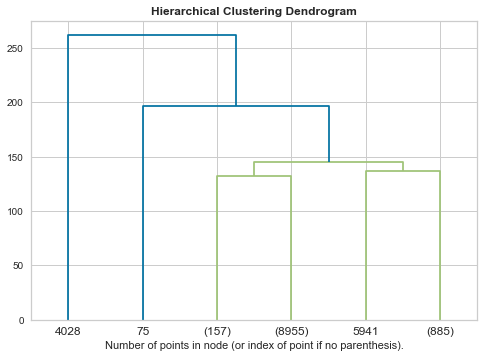

In [145]:
plot_dendrogram(X_sample, truncate_mode='level', p=3)

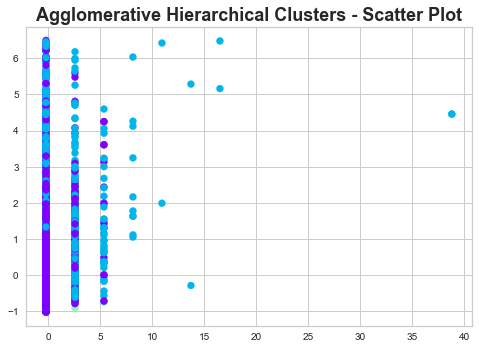

In [146]:
#
# Create the clusters using Agglomerative hierarchical clustering
#
agc = AgglomerativeClustering(n_clusters = 5)
plt.scatter(X_sample['frequency'], X_sample['monetary'], c = agc.fit_predict(X_sample), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()

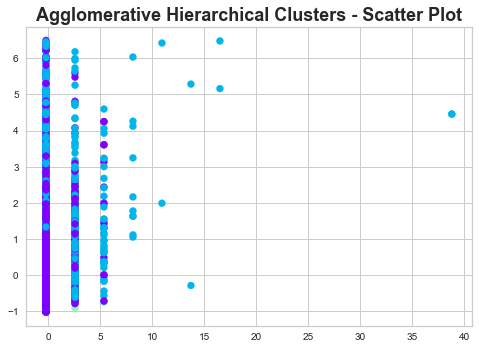

In [147]:
#
# Create the clusters using Agglomerative hierarchical clustering
#
agc = AgglomerativeClustering(n_clusters = 5)
plt.scatter(X_sample['frequency'], X_sample['monetary'], c = agc.fit_predict(X_sample), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()

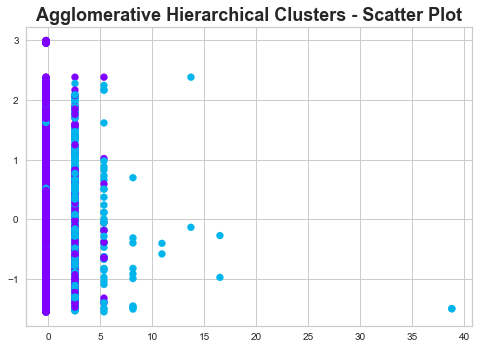

In [148]:
#
# Create the clusters using Agglomerative hierarchical clustering
#
agc = AgglomerativeClustering(n_clusters = 5)
plt.scatter(X_sample['frequency'], X_sample['recency'], c = agc.fit_predict(X_sample), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()

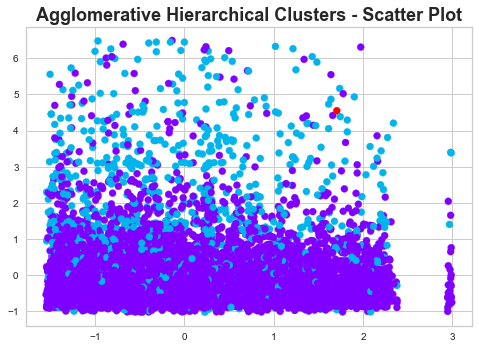

In [149]:
#
# Create the clusters using Agglomerative hierarchical clustering
#
agc = AgglomerativeClustering(n_clusters = 5)
plt.scatter(X_sample['recency'], X_sample['monetary'], c = agc.fit_predict(X_sample), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()

In [151]:
X = rfm_df.copy()

scaler = StandardScaler()
# X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# encoder = OneHotEncoder(sparse=False)
# X_categorical = encoder.fit_transform(X[categorical_columns])
# X = pd.merge(X[numerical_columns], 
#              pd.DataFrame(data = X_categorical, 
#                           columns = encoder.get_feature_names(['state'])).set_index(X.index),
#                           left_index = True, right_index = True, how='left')
X.drop_duplicates(inplace=True)
X=X.dropna()
X.name = "X"
X.shape

(88315, 3)

In [152]:
X_sample = X.copy()
X_sample = X_sample.sample(n=10000)
X_sample.name = "X_sample"
X_sample.shape

(10000, 3)

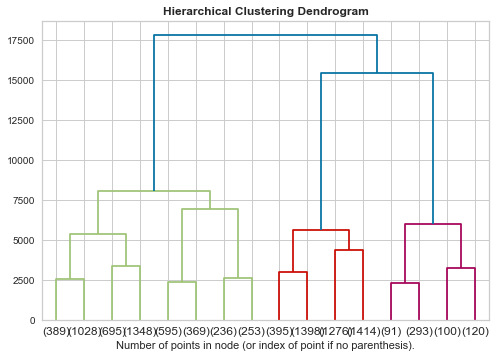

In [153]:
plot_dendrogram(X_sample, truncate_mode='level', p=3)

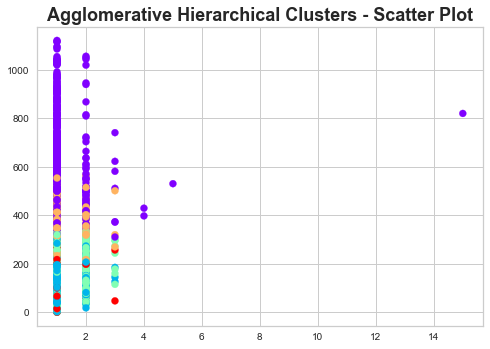

In [154]:
#
# Create the clusters using Agglomerative hierarchical clustering
#
agc = AgglomerativeClustering(n_clusters = 5)
plt.scatter(X_sample['frequency'], X_sample['monetary'], c = agc.fit_predict(X_sample), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()

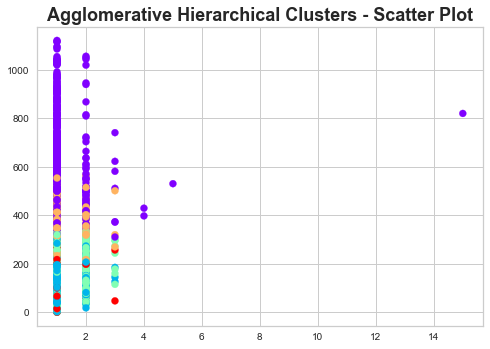

In [155]:
#
# Create the clusters using Agglomerative hierarchical clustering
#
agc = AgglomerativeClustering(n_clusters = 5)
plt.scatter(X_sample['frequency'], X_sample['monetary'], c = agc.fit_predict(X_sample), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()

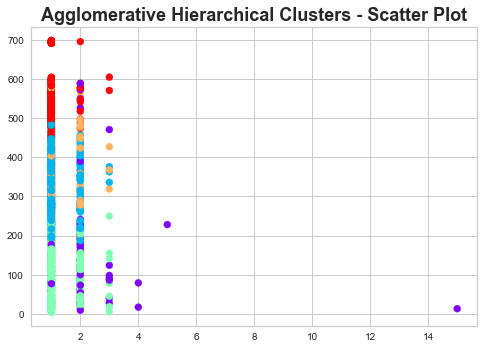

In [156]:
#
# Create the clusters using Agglomerative hierarchical clustering
#
agc = AgglomerativeClustering(n_clusters = 5)
plt.scatter(X_sample['frequency'], X_sample['recency'], c = agc.fit_predict(X_sample), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()

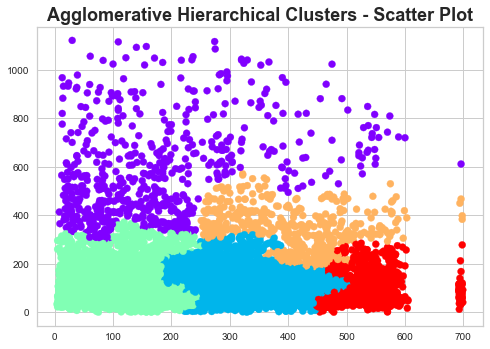

In [157]:
#
# Create the clusters using Agglomerative hierarchical clustering
#
agc = AgglomerativeClustering(n_clusters = 5)
plt.scatter(X_sample['recency'], X_sample['monetary'], c = agc.fit_predict(X_sample), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()

## Ressources